In [2]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data_jobs.csv")

#Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_DK=df[df['job_country']=='Denmark']

In [7]:
df_skills=df_DK.explode('job_skills')

df_skills[['job_title','job_skills']]

,job_title,job_skills
8,Technology & Operations Business Analyst,excel
8,Technology & Operations Business Analyst,powerpoint
8,Technology & Operations Business Analyst,power bi
361,Senior/Lead Data Analyst,sql
361,Senior/Lead Data Analyst,r
...,...,...
785281,Student Worker - Data Platform Engineering,kubernetes
785281,Student Worker - Data Platform Engineering,terraform
785632,Senior Data Analyst,sql
785632,Senior Data Analyst,r


In [12]:
df_skills_count = df_skills.groupby(["job_skills", "job_title_short"]).size()
df_skills_count = df_skills_count.reset_index(name="skill_count")

df_skills_count.sort_values(by="skill_count", ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
888,sql,Data Engineer,945
684,python,Data Engineer,944
685,python,Data Scientist,868
61,azure,Data Engineer,635
51,aws,Data Engineer,500
...,...,...,...
38,assembly,Machine Learning Engineer,1
1039,windows,Data Analyst,1
1043,windows,Senior Data Analyst,1
1047,wire,Data Analyst,1


In [22]:
job_titles=df_skills_count['job_title_short'].unique().tolist()
job_titles=sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [24]:
df_job_title_count = (
    df_DK["job_title_short"].value_counts().reset_index(name="jobs_total")
)

In [29]:
df_skills_perc = pd.merge(
    df_skills_count, df_job_title_count, how="left", on="job_title_short"
)

df_skills_perc["skills_percent"] = (
    100 * df_skills_perc["skill_count"] / df_skills_perc["jobs_total"]
)

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skills_percent
0,sql,Data Engineer,945,1500,63.000000
1,python,Data Engineer,944,1500,62.933333
2,python,Data Scientist,868,1373,63.219228
3,azure,Data Engineer,635,1500,42.333333
4,aws,Data Engineer,500,1500,33.333333
...,...,...,...,...,...
1066,assembly,Machine Learning Engineer,1,227,0.440529
1067,windows,Data Analyst,1,1057,0.094607
1068,windows,Senior Data Analyst,1,170,0.588235
1069,wire,Data Analyst,1,1057,0.094607


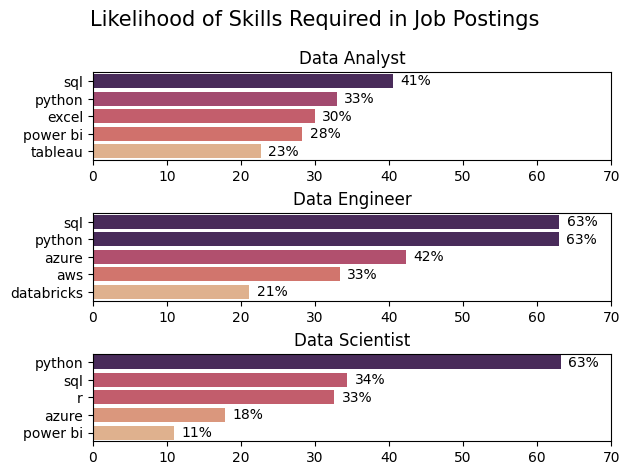

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc["job_title_short"] == job_title].head(5)
    sns.barplot(
        data=df_plot,
        x="skills_percent",
        y="job_skills",
        ax=ax[i],
        hue="skill_count",
        palette="flare",
    )
    ax[i].set_title(job_title)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 70)

    for n, value in enumerate(df_plot["skills_percent"]):
        ax[i].text(value +1, n, f'{value:.0f}%',va='center')

fig.suptitle("Likelihood of Skills Required in Job Postings", fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()